In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('사용완료된데이터/차종별 졸음운전 교통사고 현황.csv')
df

,구분,도로종류,사고(건),사망(명),부상(명)
0,2017년,일반국도,363,19,698
1,2017년,지방도,230,10,451
2,2017년,특별광역시도,590,12,1189
3,2017년,시도,577,11,1125
4,2017년,군도,101,3,169
5,2017년,고속국도,120,22,273
6,2017년,기타,21,0,41
7,2018년,일반국도,249,18,487
8,2018년,지방도,170,11,359
9,2018년,특별광역시도,329,4,710


In [3]:
df.set_index(['구분'],inplace=True)
df

,도로종류,사고(건),사망(명),부상(명)
구분,,,,
2017년,일반국도,363,19,698
2017년,지방도,230,10,451
2017년,특별광역시도,590,12,1189
2017년,시도,577,11,1125
2017년,군도,101,3,169
2017년,고속국도,120,22,273
2017년,기타,21,0,41
2018년,일반국도,249,18,487
2018년,지방도,170,11,359


In [4]:
ndf = df[df["도로종류"].str.contains("고속국도")]

In [5]:
ndf.drop(labels='도로종류',axis=1,inplace=True)

C:\Users\Jo\anaconda3\envs\pydatavenv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
ndf

,사고(건),사망(명),부상(명)
구분,,,
2017년,120,22,273
2018년,104,16,211
2019년,147,20,296


In [7]:
ndf = ndf.sum(axis=1)

In [8]:
ndf.index.tolist()

['2017년', '2018년', '2019년']

In [9]:
ndf.values.tolist()

[415, 331, 463]

In [10]:
dic = { key:0 for key in ndf.index.tolist() }

for idx,val in zip(ndf.index.tolist(),ndf.values.tolist()):
    dic[idx] = dic[idx] + val
    
dic

{'2017년': 415, '2018년': 331, '2019년': 463}

In [19]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = r'C:\Users\Jo\PYDATAexam\font\malgun.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

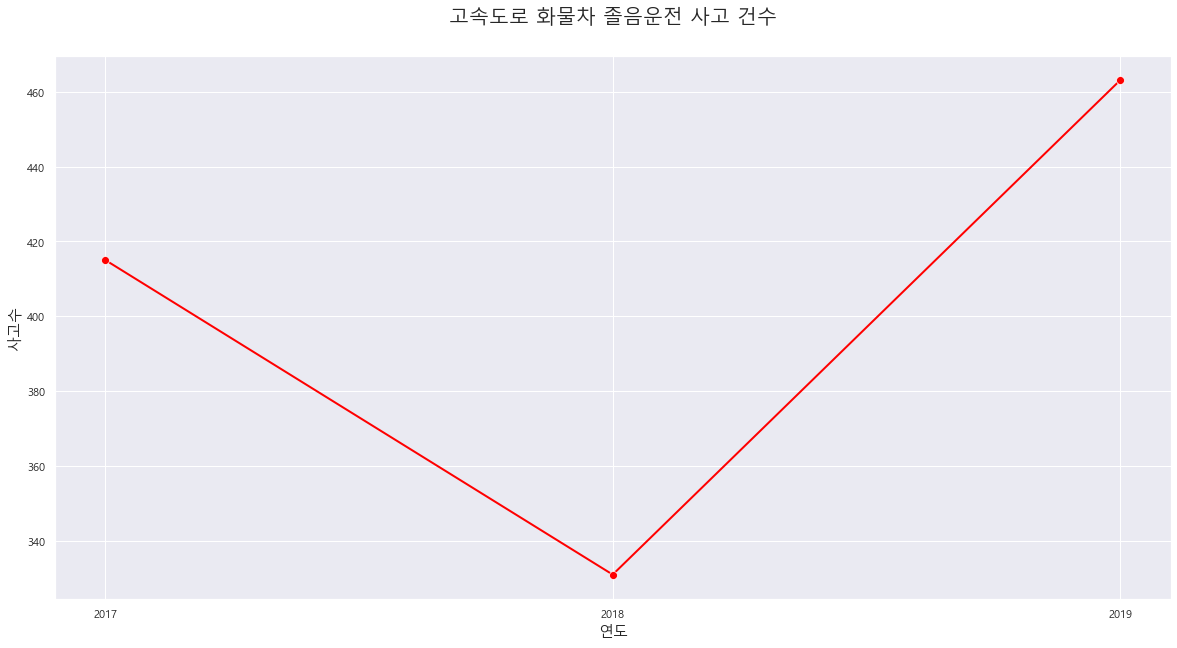

In [20]:
key = ['2017','2018','2019']
val = list(dic.values())

sns.lineplot(x=key,y=val,marker='o',linewidth=2,markersize=8,color='#ff0000')
sns.set(rc = {'figure.figsize':(20,10)})
plt.title('고속도로 화물차 졸음운전 사고 건수',size=20,y=1.05)
plt.xlabel('연도',size=15)
plt.ylabel('사고수',size=15)
plt.xticks(key)
plt.savefig('고속도로_화물차_졸음운전_사고건수_시각화.png')

<Figure size 1440x720 with 0 Axes>